In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error ,r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
#EDA ON CUSTOMERS DATASET

data1 = pd.read_csv(r"C:\Users\ASUS\Documents\project_zeotap\Customers.csv")
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [7]:
data1.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [9]:
data1.shape

(200, 4)

In [11]:
data1.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [13]:
data1.isnull().sum().reset_index()

,index,0
0,CustomerID,0
1,CustomerName,0
2,Region,0
3,SignupDate,0


In [15]:
total_customers_in_countries = data1.groupby('Region',observed=False).sum().reset_index()
total_customers_in_countries

,Region,CustomerID,CustomerName,SignupDate
0,Asia,C0002C0005C0007C0021C0022C0027C0028C0040C0043C...,Elizabeth LutzLaura WeberPaul GravesRobert Bla...,2022-02-132022-08-152022-06-182023-04-172023-1...
1,Europe,C0009C0010C0014C0017C0019C0023C0037C0041C0044C...,Joy ClarkAaron CoxDeborah WilcoxJennifer KingB...,2023-08-142022-12-152024-06-222023-12-052023-0...
2,North America,C0008C0015C0016C0018C0020C0024C0026C0029C0030C...,David LiTina DuranEmily WoodsTyler HaynesMr. M...,2024-01-132023-11-202024-01-032024-09-212024-0...
3,South America,C0001C0003C0004C0006C0011C0012C0013C0025C0031C...,Lawrence CarrollMichael RiveraKathleen Rodrigu...,2022-07-102024-03-072022-10-092024-01-072022-1...


In [17]:
#total customers in different regions
ASIA= data1[data1.Region=="Asia"]
EUROPE = data1[data1.Region=="Europe"]
NORTH_AMERICA = data1[data1.Region=="North America"]
SOUTH_AMERICA = data1[data1.Region=="South America"]
print(f"ASIA : {ASIA.shape}")
print(f"EUROPE : {EUROPE.shape}")
print(f"NORTH_AMERICA : {NORTH_AMERICA.shape}")
print(f"SOUTH_AMERICA : {SOUTH_AMERICA.shape}")

ASIA : (45, 4)
EUROPE : (50, 4)
NORTH_AMERICA : (46, 4)
SOUTH_AMERICA : (59, 4)


In [19]:
data1["SignupDate"].reset_index()

,index,SignupDate
0,0,2022-07-10
1,1,2022-02-13
2,2,2024-03-07
3,3,2022-10-09
4,4,2022-08-15
...,...,...
195,195,2022-06-07
196,196,2023-03-21
197,197,2022-02-27
198,198,2022-12-03


In [1]:
#
#
#
#

In [24]:
#EDA ON PRODUCTS

data2 = pd.read_csv(r"C:\Users\ASUS\Documents\project_zeotap\Products.csv")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [26]:
data2.shape

(100, 4)

In [28]:
data2.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [30]:
data2.isnull().reset_index()

,index,ProductID,ProductName,Category,Price
0,0,False,False,False,False
1,1,False,False,False,False
2,2,False,False,False,False
3,3,False,False,False,False
4,4,False,False,False,False
...,...,...,...,...,...
95,95,False,False,False,False
96,96,False,False,False,False
97,97,False,False,False,False
98,98,False,False,False,False


In [32]:
data2.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [34]:
data2["Category"].value_counts().reset_index()

,Category,count
0,Books,26
1,Electronics,26
2,Clothing,25
3,Home Decor,23


In [36]:
data2.loc[data2['Price']<=500]

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [38]:
data2.loc[data2['Price']<=500].shape

(100, 4)

<Axes: xlabel='Category', ylabel='Price'>

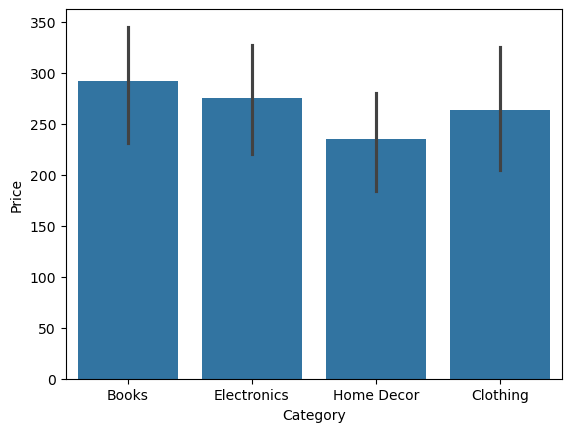

In [40]:
sns.barplot(x='Category',y='Price',data=data2)

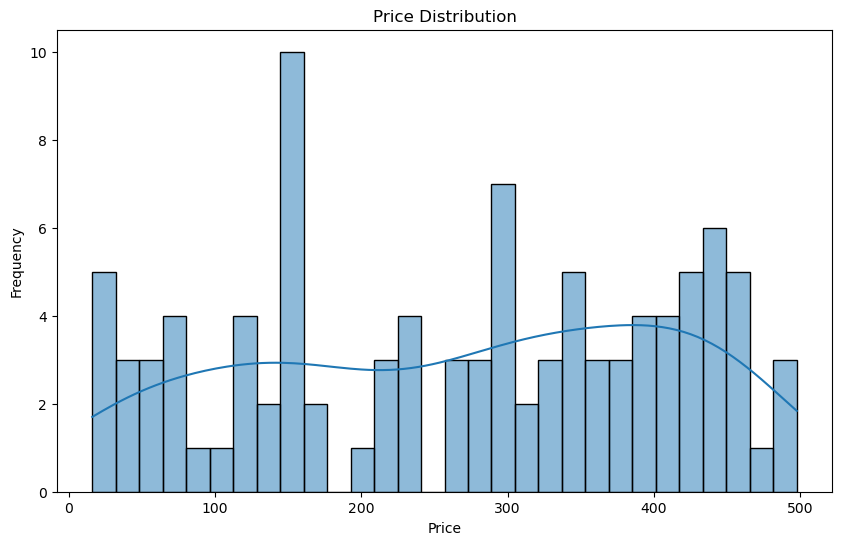

In [44]:
# Distribution of 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(data2['Price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

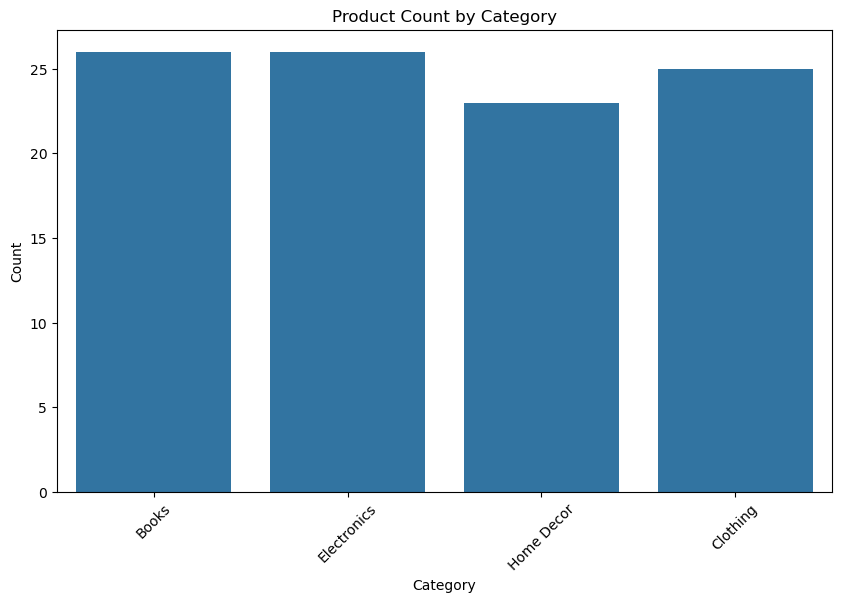

In [48]:
# Count of products by category
plt.figure(figsize=(10, 6))
sns.countplot(data=data2, x='Category')
plt.title('Product Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

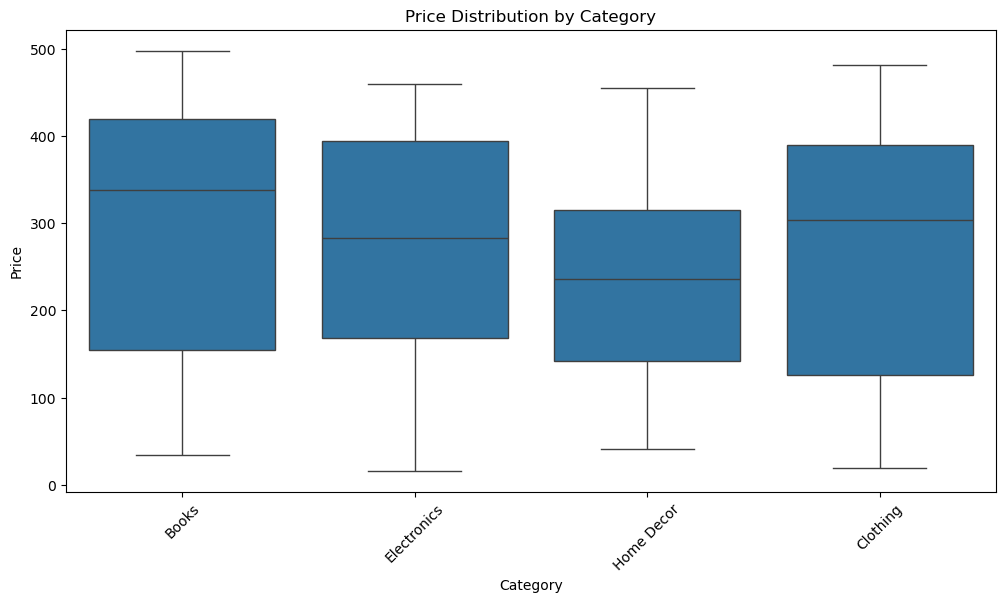

In [50]:
# Price vs. Product Category (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data2, x='Category', y='Price')
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Correlation matrix (for any numerical relationships if applicable)
correlation = data2.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [62]:
print(data2['ProductID'].nunique())

100


In [ ]:
#The EDA reveals the distribution of product prices and their variation across categories
#identifying potential pricing patterns. It shows category-wise product counts, which helps in
#understanding market segmentation. Unique product IDs highlight product diversity, while
#missing data checks ensure data quality for better decision-making and inventory management

In [64]:
#EDA ON TRANSACTIONS

data3 = pd.read_csv(r"C:\Users\ASUS\Documents\project_zeotap\Transactions.csv")
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [66]:
data3.shape

(1000, 7)

In [70]:
data3.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [80]:
data3.isnull().sum().reset_index()

,index,0
0,TransactionID,0
1,CustomerID,0
2,ProductID,0
3,TransactionDate,0
4,Quantity,0
5,TotalValue,0
6,Price,0


In [82]:
data3[['Quantity', 'TotalValue', 'Price']].describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


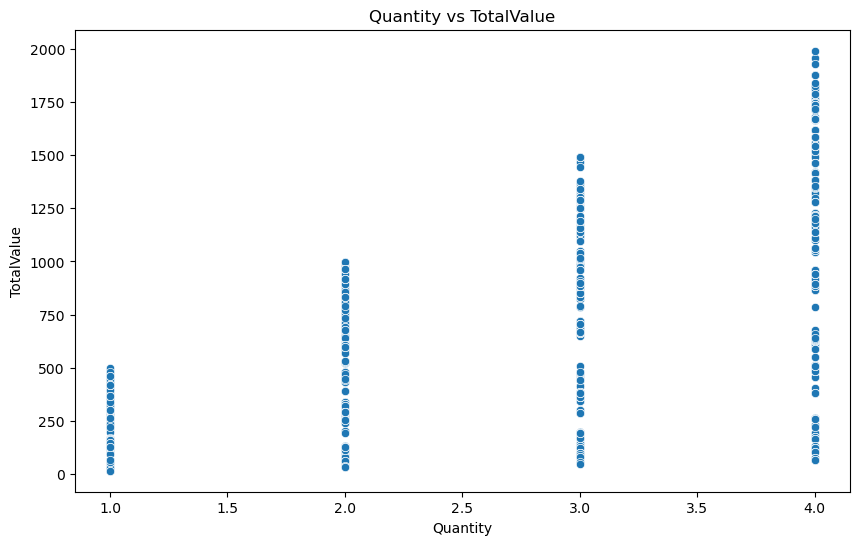

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data3, x='Quantity', y='TotalValue')
plt.title('Quantity vs TotalValue')
plt.xlabel('Quantity')
plt.ylabel('TotalValue')
plt.show()

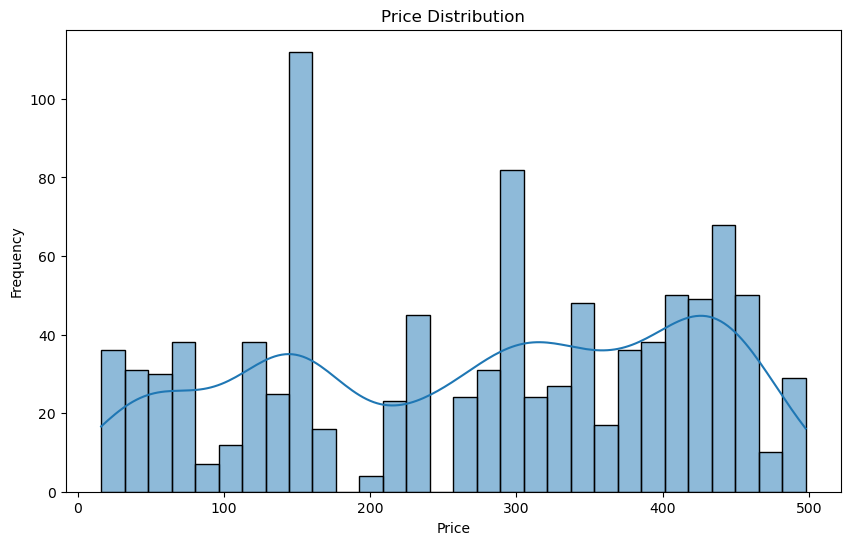

In [86]:
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data3['Price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

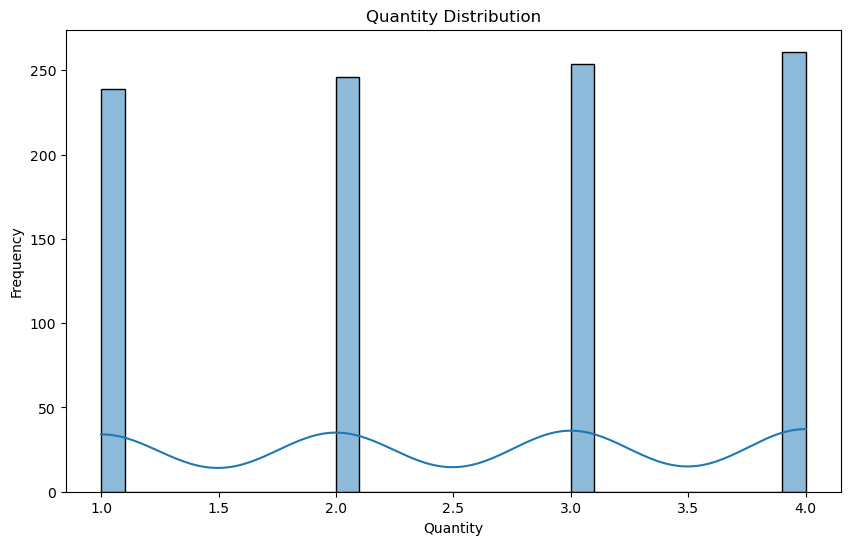

In [88]:
# Quantity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data3['Quantity'], kde=True, bins=30)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

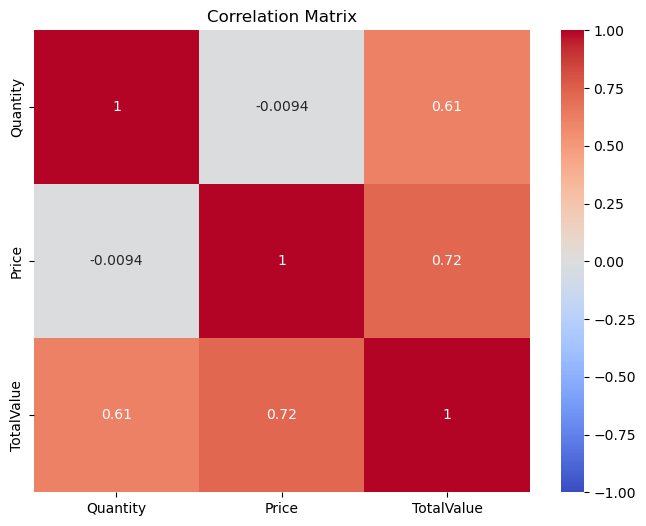

In [90]:
correlation = data3[['Quantity', 'Price', 'TotalValue']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

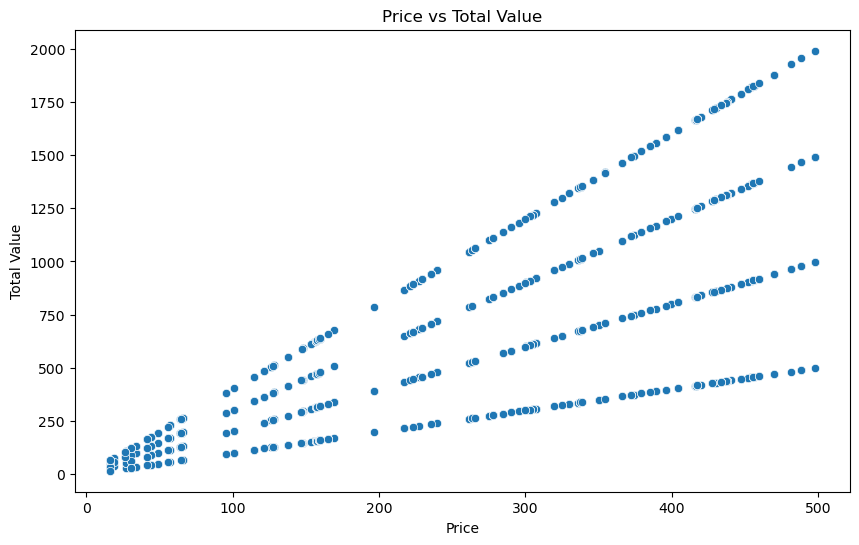

In [92]:
# Scatter plot of Price vs TotalValue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data3, x='Price', y='TotalValue')
plt.title('Price vs Total Value')
plt.xlabel('Price')
plt.ylabel('Total Value')
plt.show()

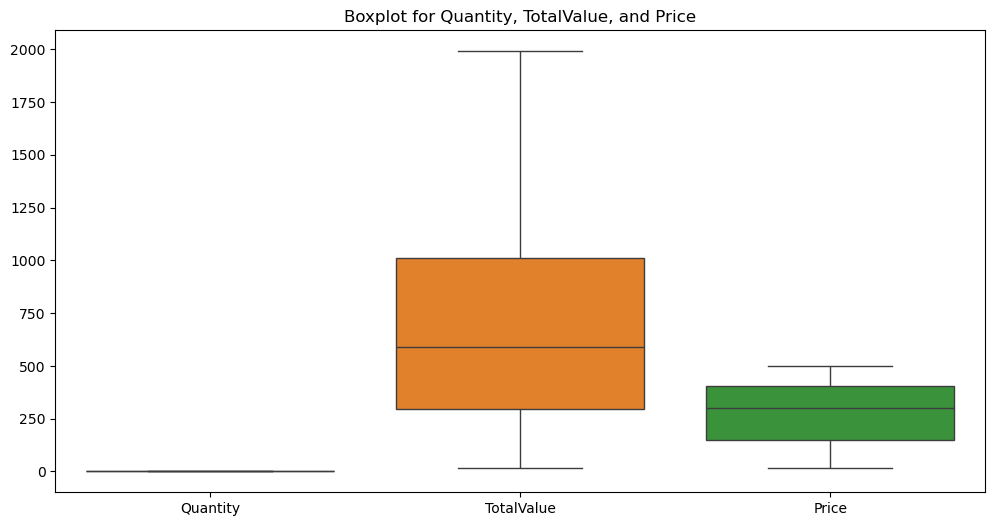

In [94]:
# Checking for any outliers in the columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data3[['Quantity', 'TotalValue', 'Price']])
plt.title('Boxplot for Quantity, TotalValue, and Price')
plt.show()

In [ ]:
#Insights from EDA (Hypothetical Example):
#A positive correlation between Quantity and TotalValue suggests that as quantity increases, the total value of the sales also increases.
#The distribution of Price might reveal a skewed pricing structure
#Boxplots may indicate if there are any extreme outliers in Quantity or TotalValue, which could represent unusual transactions or errors in the data.